In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

e:\Youtube_tutorial_projects\Pytorch_Project\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class PlayingCardDataset(Dataset):
    def __init__(self,data_dir, transform=None):
        self.data= ImageFolder(data_dir,transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [19]:
dataset = PlayingCardDataset(
    data_dir=r"E:\Youtube_tutorial_projects\Pytorch_Project\train"
    )
len(dataset), dataset.classes

(7624,
 ['ace of clubs',
  'ace of diamonds',
  'ace of hearts',
  'ace of spades',
  'eight of clubs',
  'eight of diamonds',
  'eight of hearts',
  'eight of spades',
  'five of clubs',
  'five of diamonds',
  'five of hearts',
  'five of spades',
  'four of clubs',
  'four of diamonds',
  'four of hearts',
  'four of spades',
  'jack of clubs',
  'jack of diamonds',
  'jack of hearts',
  'jack of spades',
  'joker',
  'king of clubs',
  'king of diamonds',
  'king of hearts',
  'king of spades',
  'nine of clubs',
  'nine of diamonds',
  'nine of hearts',
  'nine of spades',
  'queen of clubs',
  'queen of diamonds',
  'queen of hearts',
  'queen of spades',
  'seven of clubs',
  'seven of diamonds',
  'seven of hearts',
  'seven of spades',
  'six of clubs',
  'six of diamonds',
  'six of hearts',
  'six of spades',
  'ten of clubs',
  'ten of diamonds',
  'ten of hearts',
  'ten of spades',
  'three of clubs',
  'three of diamonds',
  'three of hearts',
  'three of spades',
  'two

In [18]:
data_dir=r"E:\Youtube_tutorial_projects\Pytorch_Project\train"
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [4]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])

train_path = r"E:\Youtube_tutorial_projects\Pytorch_Project\train"
valid_path = r"E:\Youtube_tutorial_projects\Pytorch_Project\valid"
test_path = r"E:\Youtube_tutorial_projects\Pytorch_Project\test"

train_dataset= PlayingCardDataset(data_dir=train_path, transform=transform)
val_dataset = PlayingCardDataset(data_dir=valid_path, transform=transform)
test_dataset = PlayingCardDataset(data_dir=test_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [5]:
class SimpleCardClassifier(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifier, self).__init__()
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280

        self.classifier = nn.Linear(enet_out_size, num_classes)

    def forward(self, x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = SimpleCardClassifier(num_classes=53).to(device)


Using device: cuda


In [12]:
#loss function
criterion = nn.CrossEntropyLoss()
#optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
num_epoch = 5
train_losses , val_losses = [], []

for epoch in range(num_epoch):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images , labels = images.to(device), labels.to(device)
        optimizer.zero_grad() 
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)

    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epoch}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch [1/5], Train Loss: 0.5562, Val Loss: 0.2251
Epoch [2/5], Train Loss: 0.3349, Val Loss: 0.1560
Epoch [3/5], Train Loss: 0.2510, Val Loss: 0.2067
Epoch [4/5], Train Loss: 0.1830, Val Loss: 0.1530
Epoch [5/5], Train Loss: 0.1538, Val Loss: 0.1425


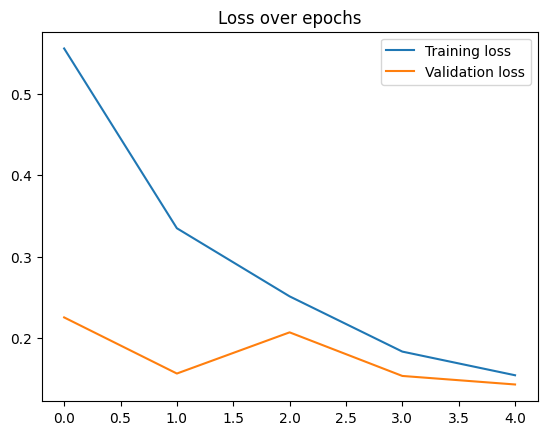

In [15]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

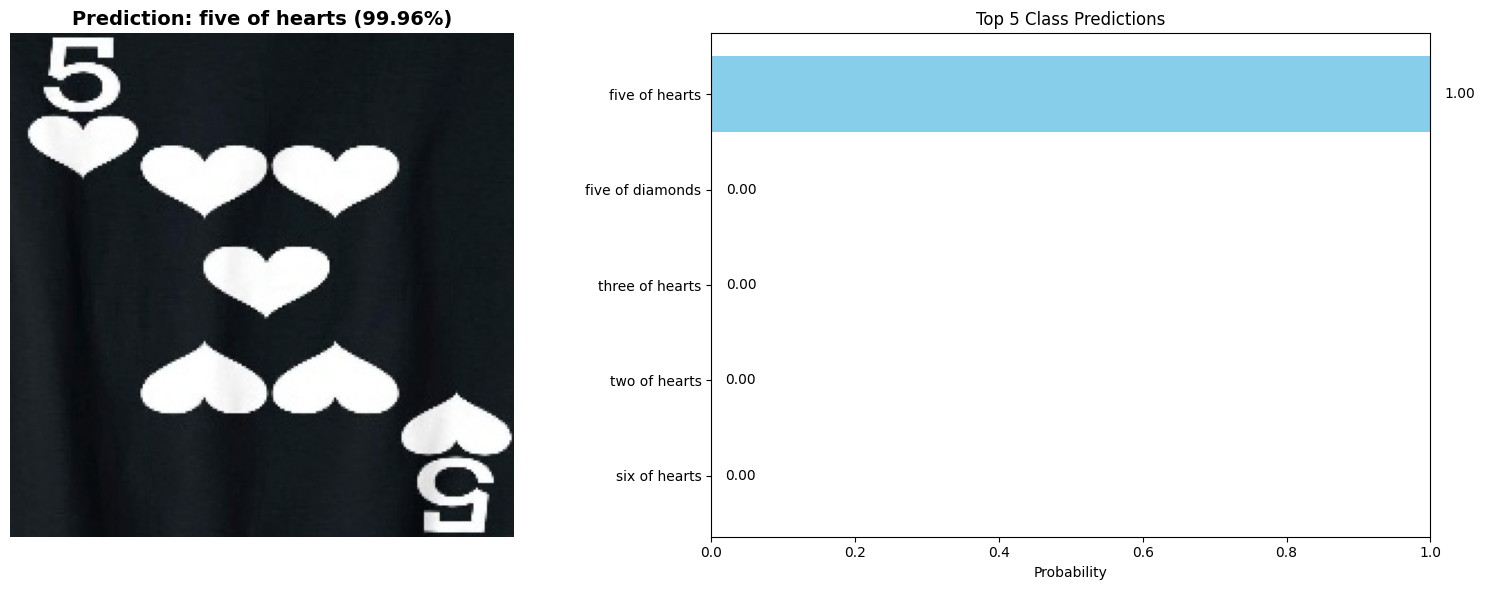

In [28]:
from PIL import Image

def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)


def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()


def visualize_predictions(original_image, probabilities, class_names, top_k=5):

    top_probs_indices = np.argsort(probabilities)[-top_k:][::-1]
    top_probs = probabilities[top_probs_indices]
    top_classes = [class_names[i] for i in top_probs_indices]

    fig, axarr = plt.subplots(1, 2, figsize=(16, 6))
    
    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")
    pred_class = top_classes[0]
    confidence = top_probs[0] * 100
    axarr[0].set_title(f"Prediction: {pred_class} ({confidence:.2f}%)", fontsize=14, fontweight="bold")

    # Display predictions
    bars = axarr[1].barh(top_classes, top_probs, color="skyblue")
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Top 5 Class Predictions")
    axarr[1].invert_yaxis()
    axarr[1].set_xlim(0, 1)

    # Annotate bars with confidence %
    for bar, prob in zip(bars, top_probs):
        axarr[1].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
                      f"{prob:.2f}", va='center', fontsize=10)
        

    plt.tight_layout()
    plt.show()


test_image = r"E:\Youtube_tutorial_projects\Pytorch_Project\test\five of hearts\1.jpg"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes 
visualize_predictions(original_image, probabilities, class_names)

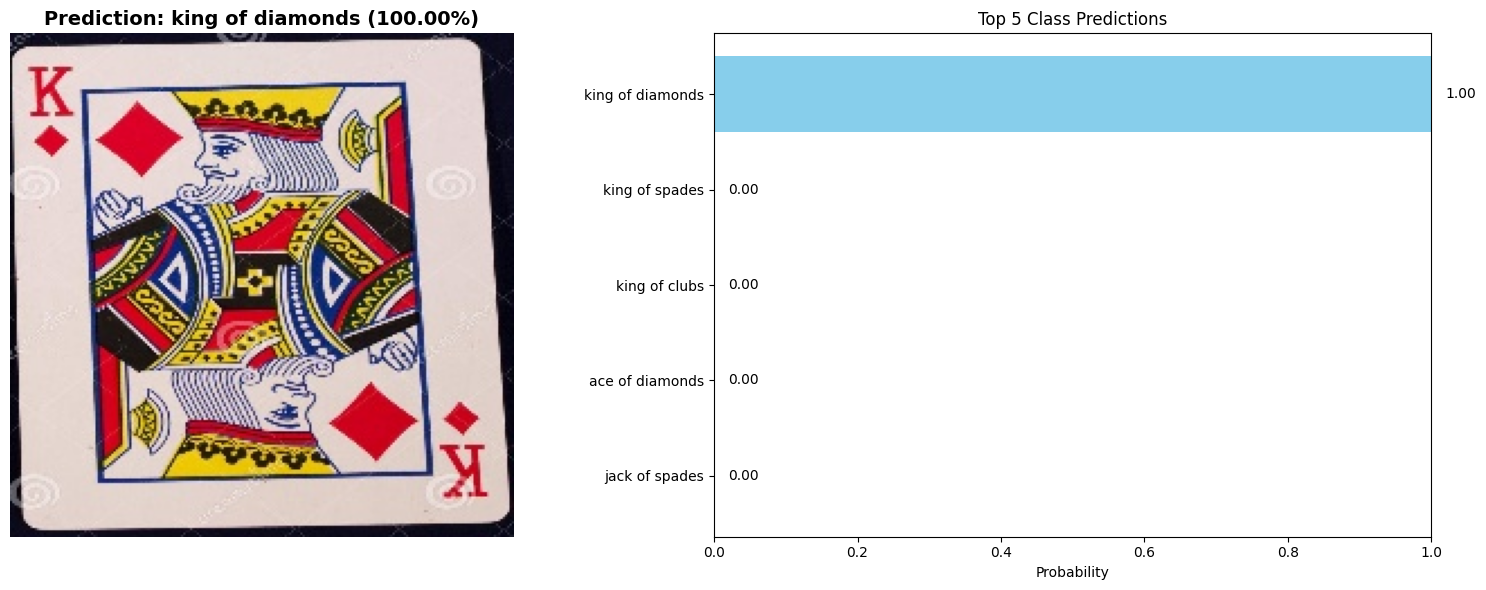

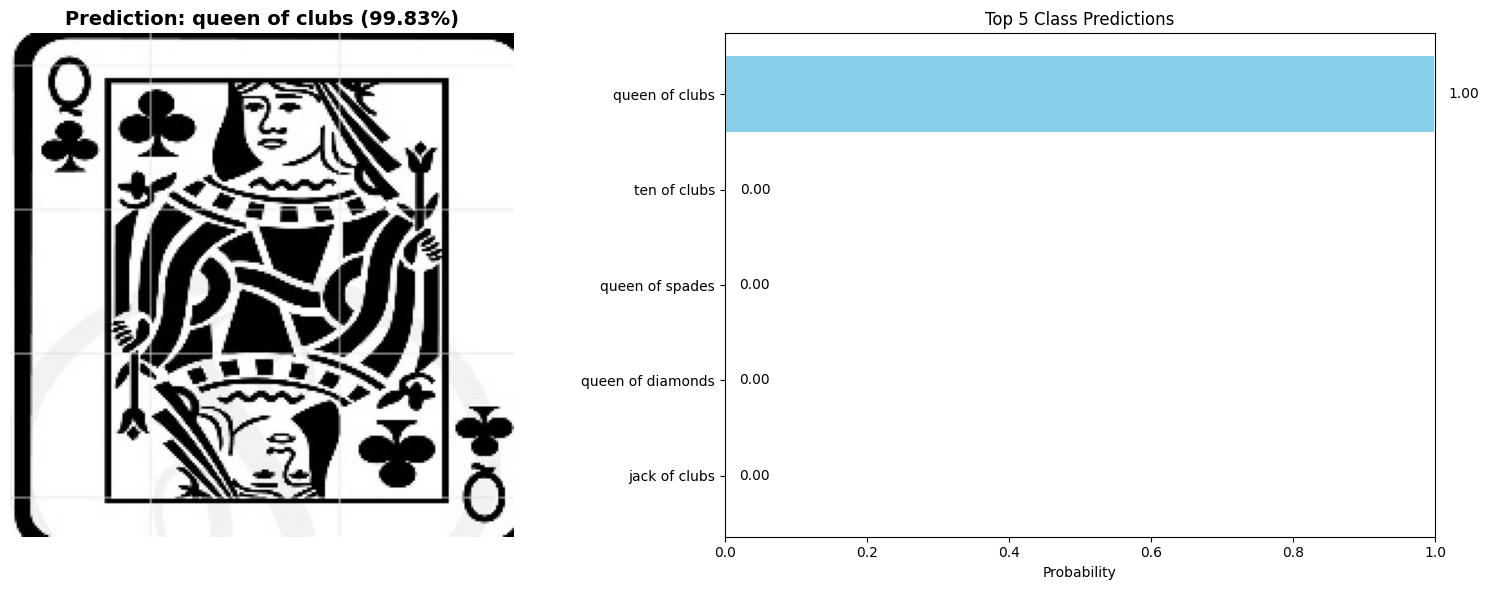

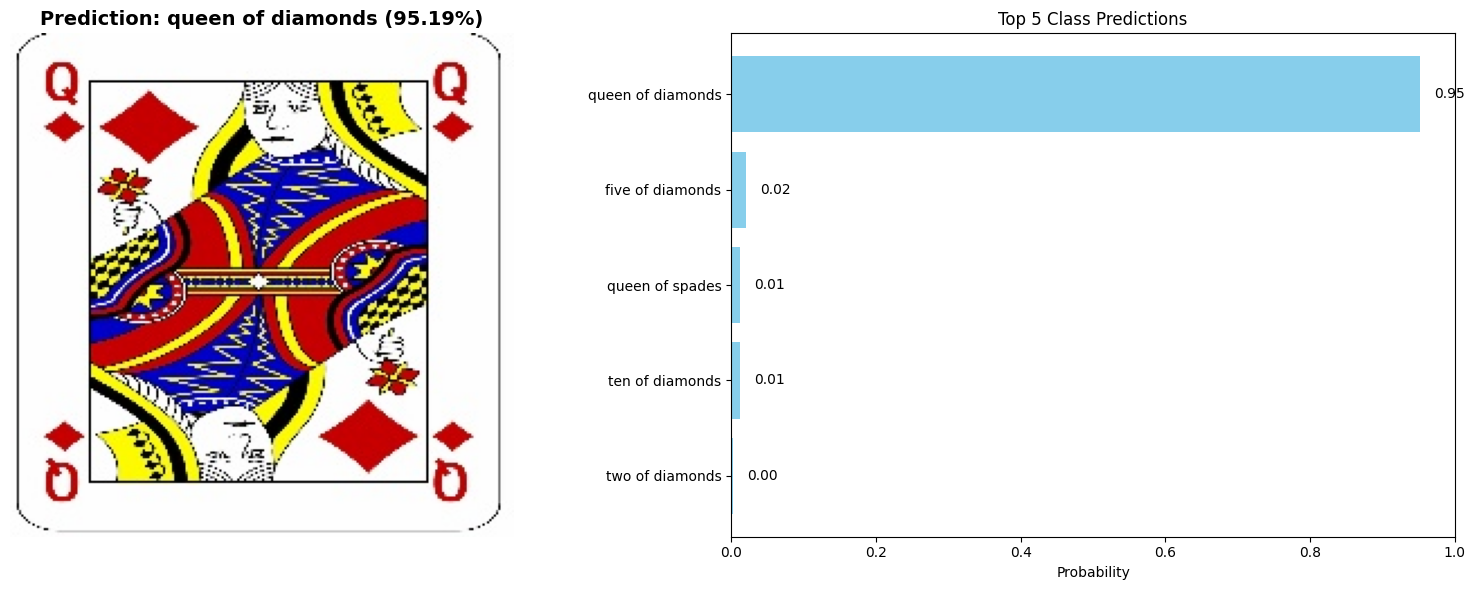

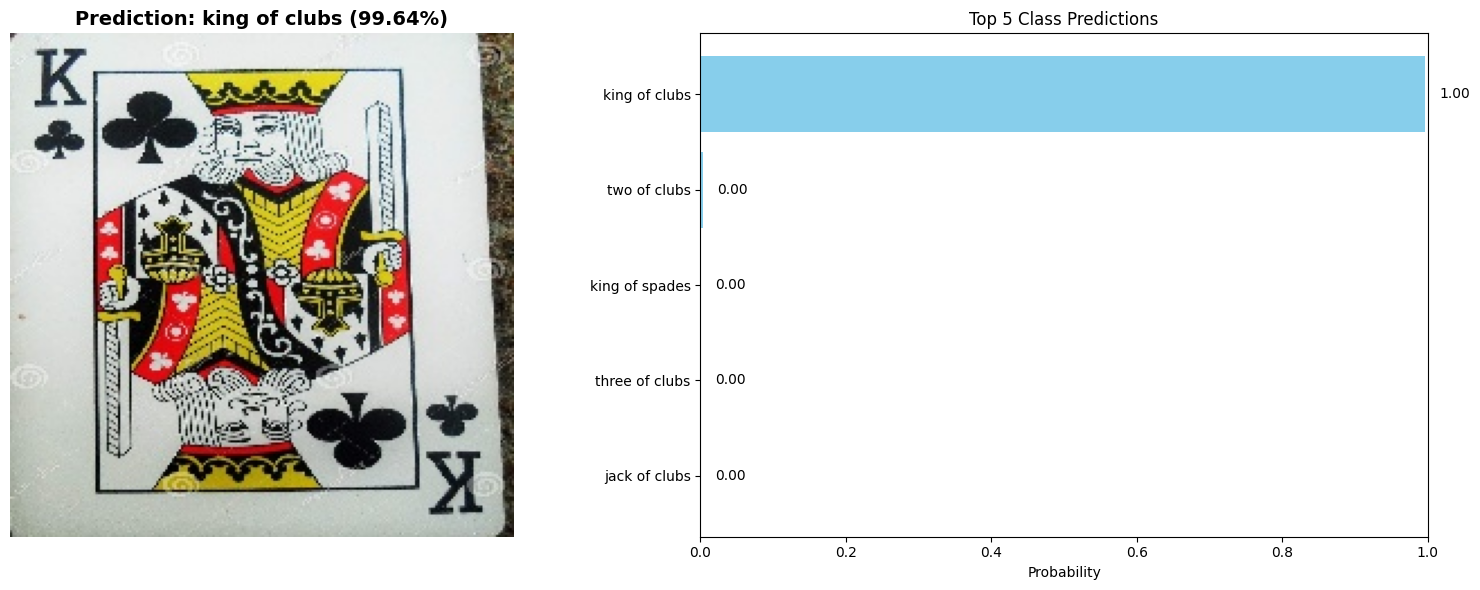

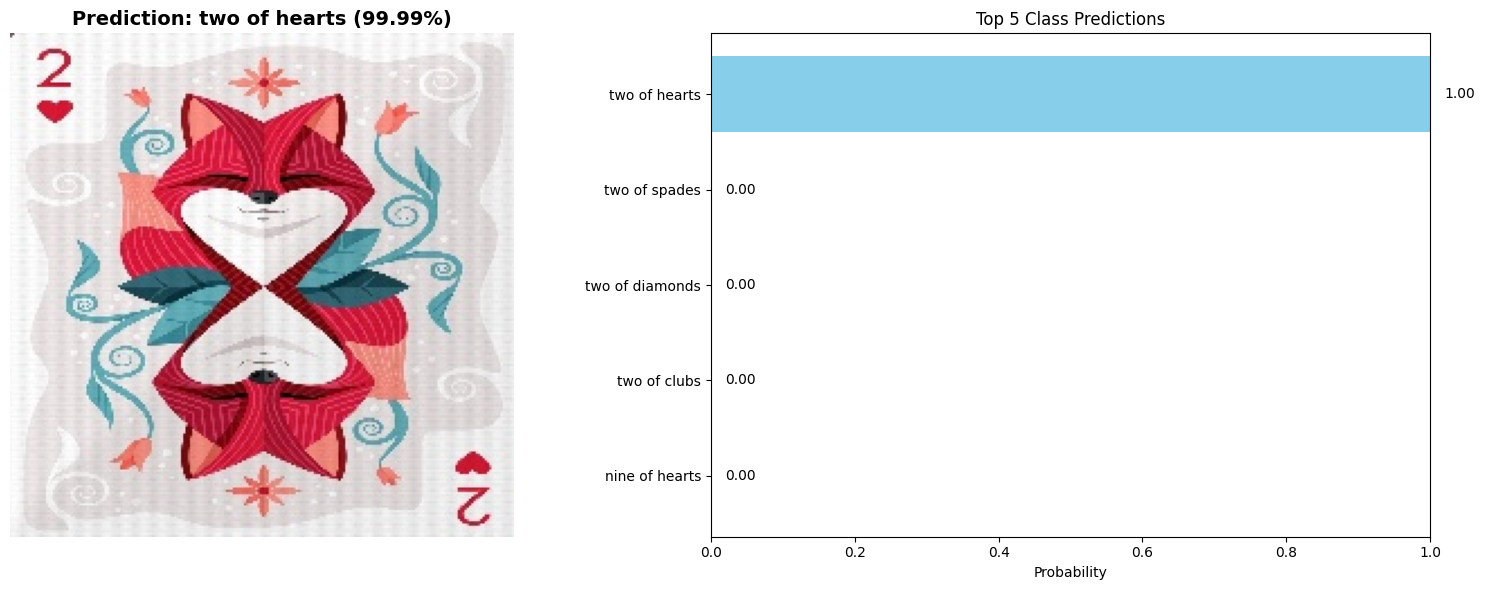

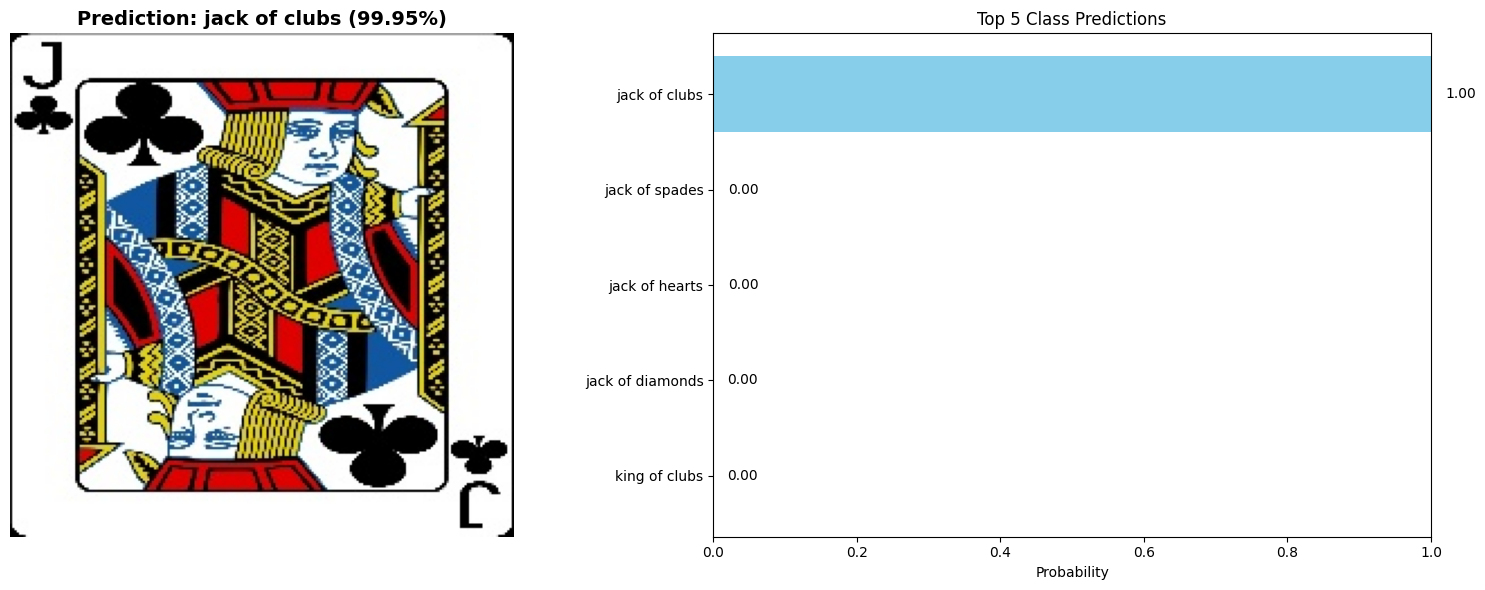

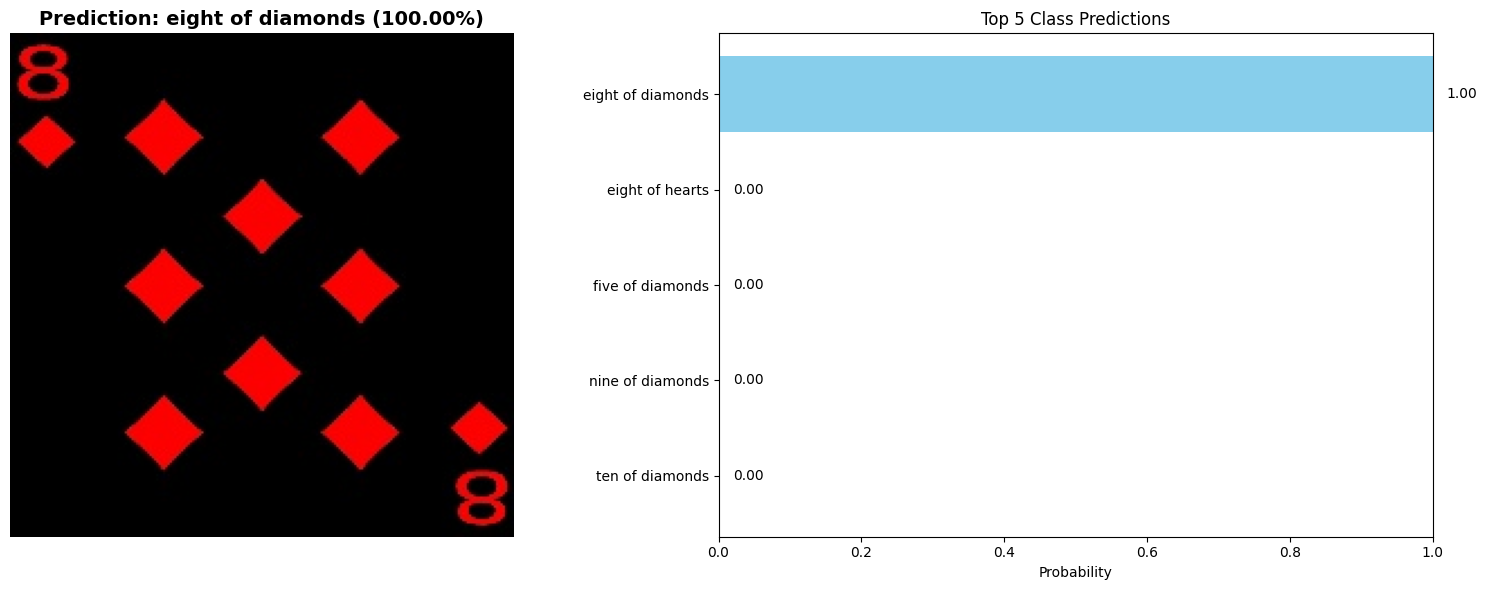

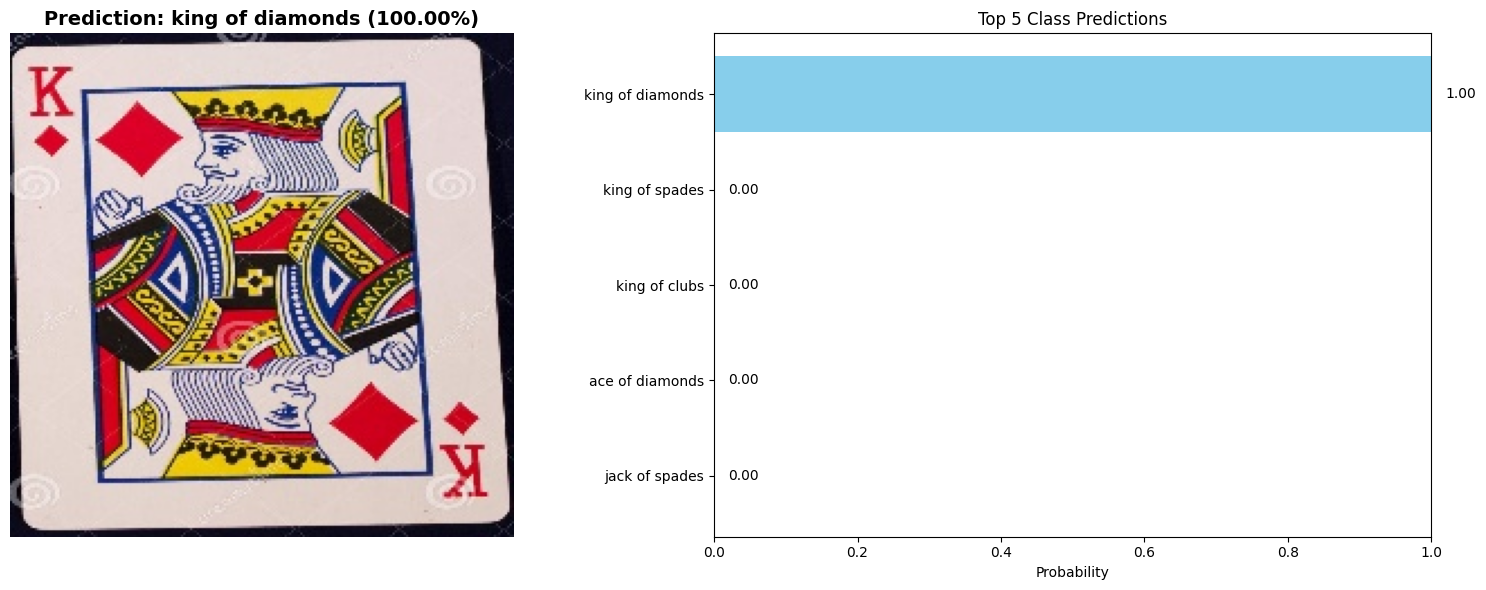

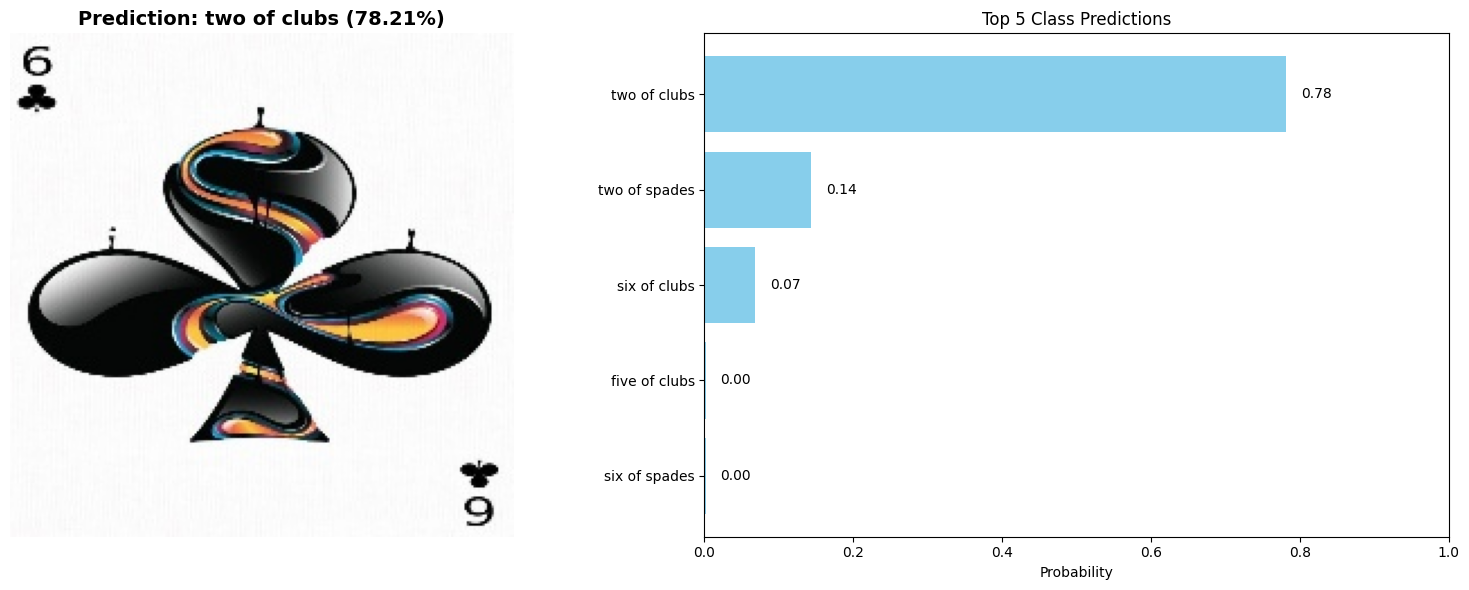

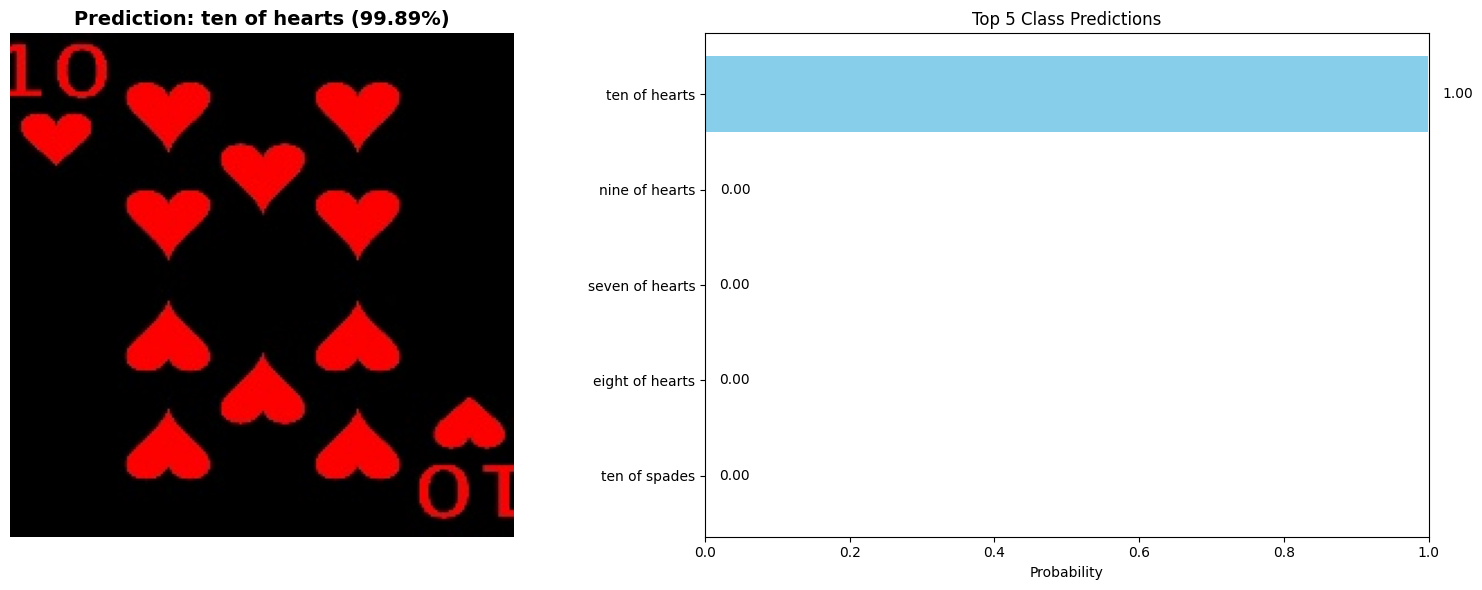

In [31]:
from glob import glob
test_images = glob(r'E:\Youtube_tutorial_projects\Pytorch_Project\test\*\*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes 
    visualize_predictions(original_image, probabilities, class_names)

In [24]:
#accuracy
correct = 0
total = 0

model.eval()
running_loss = 0.0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Get predicted class by taking argmax
        _, predicted = torch.max(outputs.data, 1)

        # Count total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        running_loss += loss.item() * images.size(0)

val_loss = running_loss / len(val_loader.dataset)
val_accuracy = 100 * correct / total


In [32]:
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Validation Loss: 0.1425, Validation Accuracy: 96.23%


In [33]:
#save model weights
torch.save(model.state_dict(), "model_weights.pth")